In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy as sp
import IPython
import sys
import sklearn
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,13)

In [2]:
#loading the datasets
train = pd.read_csv("train_HP.csv")
test = pd.read_csv("test_HP.csv")
sample = pd.read_csv("sample_HP.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#view on train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#shape of trainset
train.shape

(1460, 81)

In [6]:
#view on test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
#shape of testset
test.shape

(1459, 80)

In [8]:
#view on sample submission dataset
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [9]:
#view on sample dataset
sample.shape

(1459, 2)

In [10]:
#information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
#describing the trainset
train.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [12]:
#creating a source feature to combine the train and test datasets for preprocessing
train["source"]="train"
test["source"]="test"

In [13]:
#combining the train and test datasets in a dataframe
df = pd.concat([train,test])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [14]:
#getting features with non numerical  or catagorical values
df_catagory = df.select_dtypes(exclude=np.number).drop(columns=["source"])
df_catagory.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [15]:
#check for null values in the df_catagory
df_catagory.isna().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [16]:
df_catagory['MSZoning']= df_catagory['MSZoning'].fillna(df_catagory['MSZoning'].mode().iloc[0])
df_catagory['MSZoning'].head()

0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object

In [17]:
df_catagory['MSZoning'].isna().sum()

0

In [18]:
df_catagory["Alley"].unique()


array([nan, 'Grvl', 'Pave'], dtype=object)

In [19]:
df_catagory["Alley"].isna().sum()


2721

In [20]:
df_catagory["Alley"] = df_catagory["Alley"].transform(lambda x:x.fillna('None'))
df_catagory["Alley"].head()

0    None
1    None
2    None
3    None
4    None
Name: Alley, dtype: object

In [21]:
#check for null values in the datadrame

df_catagory["Alley"].isna().sum()

0

In [22]:
df_catagory['Utilities']= df_catagory['Utilities'].fillna(df_catagory['Utilities'].mode().iloc[0])
df_catagory['Utilities'].head()

0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
Name: Utilities, dtype: object

In [23]:
df_catagory["Utilities"].isna().sum()

0

In [24]:
df_catagory['Exterior1st']= df_catagory['Exterior1st'].fillna(df_catagory['Exterior1st'].mode().iloc[0])
df_catagory['Exterior1st'].head()

0    VinylSd
1    MetalSd
2    VinylSd
3    Wd Sdng
4    VinylSd
Name: Exterior1st, dtype: object

In [25]:
df_catagory["Exterior1st"].isna().sum()

0

In [26]:
df_catagory['Exterior2nd']= df_catagory['Exterior2nd'].fillna(df_catagory['Exterior2nd'].mode().iloc[0])
df_catagory['Exterior2nd'].head()

0    VinylSd
1    MetalSd
2    VinylSd
3    Wd Shng
4    VinylSd
Name: Exterior2nd, dtype: object

In [27]:
df_catagory["Exterior2nd"].isna().sum()

0

In [28]:
df_catagory["MasVnrType"].isna().sum()

24

In [29]:
df_catagory["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [30]:
df_catagory['MasVnrType']= df_catagory['MasVnrType'].fillna(df_catagory['MasVnrType'].mode().iloc[0])
df_catagory['MasVnrType'].head()

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

In [31]:
df_catagory_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_catagory_corr


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
Id,1.000000,0.012499,-0.007603,0.050290,0.643034,-0.002961,0.005593,-0.015920,0.027927,-0.018478,-0.022501,-0.029079,-0.000952,0.010952,-0.006386,0.010515,0.015218,0.046360,0.003806,0.009274,0.021888,-0.018942,-0.007156,0.013972,-0.003699,-0.008880,0.146477,0.010063,0.022198,0.018432,0.019957,0.010763,0.011642,0.003143,0.337664,-0.000559,0.153834,0.393678,0.374109,-0.026674,0.004808,0.014043,-0.004643,0.400916,0.230347,0.019315,0.458054,0.007206,0.007892,0.011244,0.013803,0.018874,0.003365,0.007052,-0.012515,0.017197,-0.035236,-0.018938,0.030841,0.025499,0.015500,0.037668,0.226184,0.010399,0.004324,0.039315,0.152570,0.092941,0.135809,0.014184,0.114674,0.045652,0.002988,-0.005320,-0.012808,0.051261,-0.030999,-0.136351,0.010485,0.025521,-0.479154,0.866025
MSSubClass,0.012499,1.000000,0.248483,0.088548,-0.040982,0.027354,0.170236,-0.167960,-0.009830,-0.014530,-0.068702,-0.001572,0.189967,-0.066543,0.015446,0.613200,0.501969,0.065123,0.088691,0.104346,-0.042641,-0.073455,0.000811,0.188771,0.187969,0.016436,-0.048083,0.096615,0.027167,0.156404,-0.021056,-0.003615,0.055642,-0.024793,-0.018061,0.000096,-0.003379,-0.075538,-0.057257,0.034329,0.175069,0.120870,0.062341,-0.026981,-0.099906,0.073918,-0.086965,0.059328,0.053201,0.120770,0.159282,0.312640,0.144440,0.078501,0.217978,0.042174,-0.134178,-0.087375,0.122880,0.034585,-0.060274,0.101069,-0.157105,-0.013456,-0.024439,0.095152,-0.033717,-0.130896,0.054085,-0.001642,-0.033558,0.005014,0.032274,0.011463,-0.004801,-0.014577,-0.017320,0.014571,-0.014092,-0.044103,-0.037832,0.004333
MSZoning,-0.007603,0.248483,1.000000,0.010640,-0.112495,0.045344,0.420012,-0.133611,-0.042759,0.018051,-0.068021,-0.041716,-0.076891,-0.028609,0.001041,0.289009,-0.056203,-0.008233,-0.000765,0.006582,-0.149443,-0.070900,-0.032004,-0.056112,-0.014255,0.052284,-0.105414,-0.067699,0.010986,0.011298,0.001976,0.070747,-0.071095,-0.000676,-0.074421,-0.067929,-0.081925,-0.017588,-0.038976,0.000460,-0.057268,0.111242,0.066698,-0.035257,0.082716,0.043117,-0.036324,0.057746,-0.066296,-0.028760,-0.030081,0.134316,0.036977,-0.042229,0.112958,-0.010444,-0.157200,-0.117465,0.042265,-0.059374,-0.034626,0.024846,-0.049695,-0.005014,-0.013536,0.101459,-0.074679,0.065221,0.075920,0.013043,-0.053494,-0.025918,-0.023523,-0.076429,-0.037381,-0.030637,-0.000511,0.004869,0.046760,0.046533,-0.012485,0.014276
LotFrontage,0.050290,0.088548,0.010640,1.000000,0.178239,0.006302,0.035985,0.089147,0.043232,-0.023429,0.051984,-0.001093,0.060445,-0.010559,0.017091,0.155943,-0.022101,-0.012125,-0.095210,-0.014822,-0.030815,0.023349,0.010378,-0.005735,-0.028913,0.026588,0.061598,-0.061848,-0.032991,-0.105690,0.008032,-0.005972,0.110322,-0.089224,0.028213,0.007544,0.004240,0.024529,0.087892,-0.032442,-0.120397,-0.026335,-0.018167,0.056132,0.007590,0.002123,0.029092,-0.021690,-0.024322,-0.064825,-0.038023,0.073153,-0.020484,0.023293,0.054225,-0.009913,0.060701,0.085718,0.002043,-0.069675,0.058531,-0.013038,0.033338,-0.020135,-0.045105,-0.015807,0.024333,0.087963,-0.014868,-0.018219,0.032279,0.058348,0.030373,-0.063175,-0.058773,-0.038999,0.021475,-0.016523,0.036971,0.076102,0.019680,0.039241
LotAre

In [32]:
df_catagory_corr.BsmtQual>0.2

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual       True
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual         True
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure     False
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [33]:
df_catagory["BsmtQual"] = df_catagory.groupby('ExterQual').BsmtQual.transform(lambda x : x.fillna(x.mode().iloc[0]))
df_catagory["BsmtQual"].head()

0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object

In [34]:
df_catagory["BsmtQual"].isna().sum()

0

In [35]:
df_catagory.isna().sum()

MSZoning            0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [36]:
df_catagory_corr.BsmtCond>0.2

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure     False
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [37]:
df_catagory["BsmtCond"] = df_catagory.groupby('BsmtQual').BsmtCond.transform(lambda x : x.fillna(x.mode().iloc[0]))
df_catagory["BsmtCond"].head()

0    TA
1    TA
2    TA
3    Gd
4    TA
Name: BsmtCond, dtype: object

In [38]:
df_catagory["BsmtCond"].isna().sum()

0

In [39]:
df_catagory_corr.BsmtExposure

Id               0.011642
MSSubClass       0.055642
MSZoning        -0.071095
LotFrontage      0.110322
LotArea          0.094244
Street           0.023832
Alley           -0.103081
LotShape         0.123865
LandContour      0.069335
Utilities        0.015536
LotConfig        0.055521
LandSlope        0.075293
Neighborhood    -0.084907
Condition1      -0.062769
Condition2      -0.014218
BldgType         0.008698
HouseStyle       0.176722
OverallQual     -0.079435
OverallCond     -0.148524
YearBuilt       -0.095577
YearRemodAdd     0.004845
RoofStyle        0.020699
RoofMatl         0.026580
Exterior1st     -0.074419
Exterior2nd     -0.122683
MasVnrType      -0.026628
MasVnrArea       0.137929
ExterQual       -0.146115
ExterCond       -0.069242
Foundation      -0.248360
BsmtQual        -0.002173
BsmtCond         0.047031
BsmtExposure     1.000000
BsmtFinType1    -0.123247
BsmtFinSF1       0.144343
BsmtFinType2     0.098582
BsmtFinSF2       0.063071
BsmtUnfSF        0.049156
TotalBsmtSF 

In [40]:
df_catagory["BsmtExposure"] = df_catagory.groupby('HouseStyle').BsmtExposure.transform(lambda x : x.fillna(x.mode().iloc[0]))
df_catagory["BsmtExposure"].head()

0    No
1    Gd
2    Mn
3    No
4    Av
Name: BsmtExposure, dtype: object

In [41]:
df_catagory["BsmtExposure"].isna().sum()

0

In [42]:
df_catagory_corr.BsmtFinType1

Id               0.003143
MSSubClass      -0.024793
MSZoning        -0.000676
LotFrontage     -0.089224
LotArea         -0.064688
Street           0.015416
Alley            0.057850
LotShape        -0.102662
LandContour     -0.015926
Utilities        0.004392
LotConfig       -0.019864
LandSlope        0.029475
Neighborhood     0.095170
Condition1       0.051548
Condition2      -0.010717
BldgType        -0.153718
HouseStyle       0.027188
OverallQual      0.074876
OverallCond      0.191257
YearBuilt        0.096294
YearRemodAdd     0.031973
RoofStyle        0.008080
RoofMatl         0.019656
Exterior1st      0.087815
Exterior2nd      0.155291
MasVnrType       0.044902
MasVnrArea      -0.115753
ExterQual        0.199975
ExterCond        0.071585
Foundation       0.172250
BsmtQual         0.252236
BsmtCond         0.200265
BsmtExposure    -0.123247
BsmtFinType1     1.000000
BsmtFinSF1      -0.056978
BsmtFinType2     0.241765
BsmtFinSF2       0.175679
BsmtUnfSF        0.047123
TotalBsmtSF 

In [43]:
df_catagory["BsmtFinType1"] = df_catagory.groupby('BsmtQual').BsmtFinType1.transform(lambda x : x.fillna(x.mode().iloc[0]))
df_catagory["BsmtFinType1"].head()

0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object

In [44]:
df_catagory["BsmtFinType1"].isna().sum()

0

In [45]:
df_catagory_corr.BsmtFinType2

Id              -0.000559
MSSubClass       0.000096
MSZoning        -0.067929
LotFrontage      0.007544
LotArea         -0.004295
Street           0.006076
Alley           -0.042194
LotShape         0.025557
LandContour     -0.033467
Utilities        0.043722
LotConfig        0.026173
LandSlope        0.083873
Neighborhood    -0.015409
Condition1       0.019424
Condition2       0.002047
BldgType        -0.034671
HouseStyle       0.082145
OverallQual     -0.035458
OverallCond      0.048051
YearBuilt        0.034133
YearRemodAdd     0.132449
RoofStyle        0.079211
RoofMatl         0.048898
Exterior1st      0.109896
Exterior2nd      0.103663
MasVnrType      -0.018820
MasVnrArea       0.006187
ExterQual        0.039907
ExterCond        0.035525
Foundation      -0.027876
BsmtQual         0.049830
BsmtCond         0.082885
BsmtExposure     0.098582
BsmtFinType1     0.241765
BsmtFinSF1       0.170157
BsmtFinType2     1.000000
BsmtFinSF2       0.756860
BsmtUnfSF       -0.057666
TotalBsmtSF 

In [46]:
df_catagory["BsmtFinType2"] = df_catagory.groupby('BsmtFinType1').BsmtFinType2.transform(lambda x : x.fillna(x.mode().iloc[0]))
df_catagory["BsmtFinType2"].head()

0    Unf
1    Unf
2    Unf
3    Unf
4    Unf
Name: BsmtFinType2, dtype: object

In [47]:
df_catagory["BsmtFinType2"].isna().sum()

0

In [48]:
df_catagory.isna().sum()

MSZoning            0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [49]:
df_catagory['Electrical']= df_catagory['Electrical'].fillna(df_catagory['Electrical'].mode().iloc[0])
df_catagory['Electrical'].head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [50]:
df_catagory['Electrical'].isna().sum()

0

In [51]:
df_catagory['KitchenQual']= df_catagory['KitchenQual'].fillna(df_catagory['KitchenQual'].mode().iloc[0])
df_catagory['KitchenQual'].head()

0    Gd
1    TA
2    Gd
3    Gd
4    Gd
Name: KitchenQual, dtype: object

In [52]:
df_catagory['KitchenQual'].isna().sum()

0

In [53]:
df_catagory['Functional']= df_catagory['Functional'].fillna(df_catagory['Functional'].mode().iloc[0])
df_catagory['Functional'].head()

0    Typ
1    Typ
2    Typ
3    Typ
4    Typ
Name: Functional, dtype: object

In [54]:
df_catagory['Functional'].isna().sum()

0

In [55]:
df_catagory['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [56]:
df_catagory["FireplaceQu"] = df_catagory["FireplaceQu"].transform(lambda x:x.fillna('None'))
df_catagory["FireplaceQu"].head()

0    None
1      TA
2      TA
3      Gd
4      TA
Name: FireplaceQu, dtype: object

In [57]:
df_catagory["FireplaceQu"].isna().sum()

0

In [58]:
one_shot = df_catagory.select_dtypes(exclude = np.number).columns
one_shot = one_shot.drop('SaleType')
one_shot

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleCondition'],
      dtype='object')

In [59]:
df_catagory[one_shot] = df_catagory[one_shot].fillna("None")

In [60]:
df_catagory.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         1
SaleCondition    0
dtype: int64

In [61]:
df_catagory['SaleType']= df_catagory['SaleType'].fillna(df_catagory['SaleType'].mode().iloc[0])
df_catagory['SaleType'].head()

0    WD
1    WD
2    WD
3    WD
4    WD
Name: SaleType, dtype: object

In [62]:
df_catagory['SaleType'].isna().sum()

0

In [63]:
df_catagory.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [64]:
df_numeric = df.select_dtypes(include=np.number).drop(columns=["Id","SalePrice"])
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


In [65]:
df_numeric.shape

(2919, 36)

In [66]:
df_numeric.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [67]:
df_numeric.isna().sum()

MSSubClass         0
LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [68]:
df_numeric = df_numeric.apply(pd.to_numeric)

In [69]:
df_numeric_corr = df_numeric.corr()
df_numeric_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,-0.072530,-0.125994,-0.219965,-0.248641,0.309309,0.026482,0.071677,0.009950,-0.001878,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.087898,-0.046597,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028
LotFrontage,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,0.354822,0.458247,0.026545,0.004894,0.382462,0.113245,-0.025629,0.181668,0.039452,0.234892,0.004676,0.349513,0.261970,0.076673,0.310587,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917
LotArea,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,0.254138,0.332460,0.031515,0.000554,0.284519,0.128349,0.026292,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.008628,0.180434,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234
OverallQual,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,-0.042771,0.275175,0.549294,0.479152,0.245596,-0.048393,0.575126,0.164543,-0.040732,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.571803,0.600744,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614
OverallCond,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,0.041501,-0.138202,-0.174002,-0.157418,0.005494,0.009048,-0.116569,-0.042133,0.084181,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.325849,-0.181787,-0.154149,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102
YearBuilt,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,0.408515,0.310814,0.017588,-0.144191,0.242666,0.211580,-0.030282,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.834812,0.538074,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344
YearRemodAdd,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,0.298107,0.242245,0.158985,-0.060371,0.316972,0.134947,-0.046285,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.652365,0.426022,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203
MasVnrArea,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,0.397240,0.395834,0.121014,-0.057912,0.402994,0.141593,0.015006,0.259777,0.191950,0.078126,-0.051389,0.278228,0.275195,0.255112,0.361190,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510
BsmtFinSF1,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,0.536467,0.458092,-0.162301,-0.066028,0.211669,0.638847,0.078361,0.081525,-0.007311,-0.113547,-0.086354,0.052141,0.293089,0.194270,0.255482,0.310449,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556
BsmtFinSF2,-0.072530,0.047431,0.084059,-0.042771,0.041501,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,-0.238241,0.089410,0.084330,-0.097744,-0.004923,-0.017872,0.162835,0.099485,-0.075432,-0.032448,-0.031223,-0.037779,-0.048423,0.065625,-0.068549,-0.014827,0.003139,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,0.008883


In [70]:
df_numeric_corr.LotFrontage>0.4

MSSubClass       False
LotFrontage       True
LotArea           True
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
Name: LotFrontage, dtype: bool

In [71]:
df_numeric= df_numeric.fillna(value = 0)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


In [72]:
df_numeric.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [73]:
df_numeric['differenceYrSoldBuilt'] = df_numeric['YrSold'] - df_numeric['YearBuilt']


In [74]:
df_numeric['houseAge'] = 2021 - df_numeric['YearBuilt']
df_numeric['AgeYrSold'] = 2021 - df_numeric['YrSold']


In [75]:
from  datetime import datetime
datetime.now().year

2021

In [76]:
df_numeric['YearRemodAdd'] = 2021 - df_numeric['YearRemodAdd'] 
df_numeric['GarageYrBlt'] = df_numeric['GarageYrBlt'].apply(int)

In [77]:
df_numeric['GarageYrBlt'] = 2021 - df_numeric['GarageYrBlt']
df_numeric['GarageYrBlt'].head(50)

0       18
1       45
2       20
3       23
4       21
5       28
6       17
7       48
8       90
9       82
10      56
11      16
12      59
13      15
14      61
15      30
16      51
17      54
18      17
19      63
20      16
21      91
22      19
23      45
24      53
25      14
26      16
27      13
28      64
29     101
30     101
31      55
32      14
33      62
34      16
35      17
36      26
37      67
38      68
39    2021
40      56
41      62
42      38
43      44
44      62
45      16
46      18
47      15
48    2021
49      55
Name: GarageYrBlt, dtype: int64

In [78]:
df_numeric['GarageYrBlt'] = df_numeric['GarageYrBlt'].replace(2021,1)
df_numeric['GarageYrBlt'].head(50)

0      18
1      45
2      20
3      23
4      21
5      28
6      17
7      48
8      90
9      82
10     56
11     16
12     59
13     15
14     61
15     30
16     51
17     54
18     17
19     63
20     16
21     91
22     19
23     45
24     53
25     14
26     16
27     13
28     64
29    101
30    101
31     55
32     14
33     62
34     16
35     17
36     26
37     67
38     68
39      1
40     56
41     62
42     38
43     44
44     62
45     16
46     18
47     15
48      1
49     55
Name: GarageYrBlt, dtype: int64

In [79]:
df_numeric['YearRemodAdd']
df_numeric['GarageYrBlt']

0        18
1        45
2        20
3        23
4        21
5        28
6        17
7        48
8        90
9        82
10       56
11       16
12       59
13       15
14       61
15       30
16       51
17       54
18       17
19       63
20       16
21       91
22       19
23       45
24       53
25       14
26       16
27       13
28       64
29      101
30      101
31       55
32       14
33       62
34       16
35       17
36       26
37       67
38       68
39        1
40       56
41       62
42       38
43       44
44       62
45       16
46       18
47       15
48        1
49       55
50       24
51       36
52       58
53       40
54       59
55       57
56       22
57       17
58       15
59       48
60       15
61       86
62       15
63       31
64       23
65       17
66       51
67       18
68       76
69       68
70       48
71       34
72       23
73       32
74      106
75       48
76       65
77       73
78        1
79       55
80       53
81       23
82       14
83  

In [80]:
del df_numeric['YearBuilt']
del df_numeric['YrSold']

In [81]:
df_encoded = pd.get_dummies(df_catagory.select_dtypes(exclude=np.number))

In [82]:
preprocessed_data = pd.concat([df_numeric, df_encoded, df[['Id','SalePrice']]] , axis = 1)


In [83]:
preprocessed_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,differenceYrSoldBuilt,houseAge,AgeYrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFini

In [84]:
preprocessed_data.isna().sum()

MSSubClass                  0
LotFrontage                 0
LotArea                     0
OverallQual                 0
OverallCond                 0
YearRemodAdd                0
MasVnrArea                  0
BsmtFinSF1                  0
BsmtFinSF2                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
TotRmsAbvGrd                0
Fireplaces                  0
GarageYrBlt                 0
GarageCars                  0
GarageArea                  0
WoodDeckSF                  0
OpenPorchSF                 0
EnclosedPorch               0
3SsnPorch                   0
ScreenPorch                 0
PoolArea                    0
MiscVal                     0
MoSold    

In [85]:
train_processed = preprocessed_data.dropna(subset=['SalePrice'])


In [86]:
test_processed = preprocessed_data[preprocessed_data['SalePrice'].isna()]


In [87]:
train_X = train_processed.drop(columns=["Id", "SalePrice"])
train_y = train_processed['SalePrice']
test_X = test_processed.drop(columns=["Id", "SalePrice"])

In [88]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [89]:
sample = pd.read_csv("sample_HP.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("Mean Absolute Error of train data = ",mean_absolute_error(train_y,pred_train))
    print("RMSE of train data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    print("Mean Absolute Percentage Error of train data = ", mean_absolute_percentage_error(train_y, pred_train))
    sample["SalePrice"] = pred_test
    sample.to_csv(filename, index = False)


Mean Absolute Error of train data =  13334.504109589041
RMSE of train data =  20612.3587743486
Cross validation Score  =  2.5303576584277203e+17
Mean Absolute Percentage Error of train data =  7.85973272339419


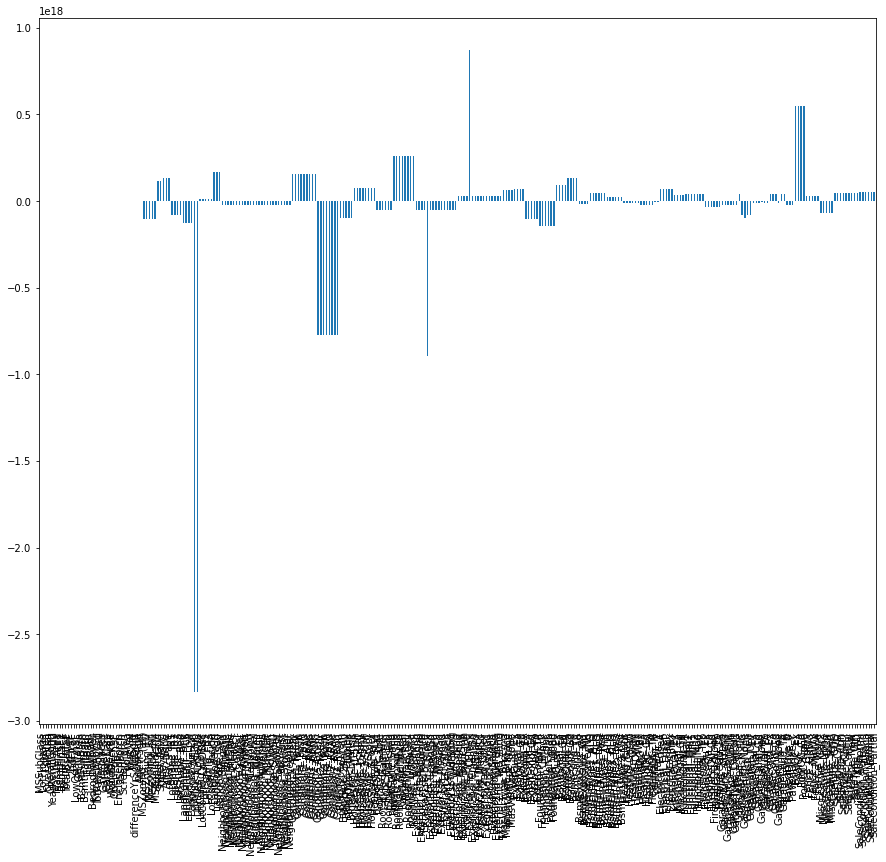

In [90]:
LR_model = LinearRegression(normalize=True)
run_model(LR_model, train_X, train_y, test_X, sample, "HP_predresults_LR.csv" )

In [91]:
print("Training set score_Ridge: {:.2f}".format(LR_model.score(train_X, train_y)))
print("Number of features used_Ridge: {}".format(np.sum(LR_model.coef_ != 0)))

Training set score_Ridge: 0.93
Number of features used_Ridge: 298


Mean Absolute Error of train data =  13437.662910113871
RMSE of train data =  21236.41599425316
Cross validation Score  =  31136.914347726655
Mean Absolute Percentage Error of train data =  7.772616003285961


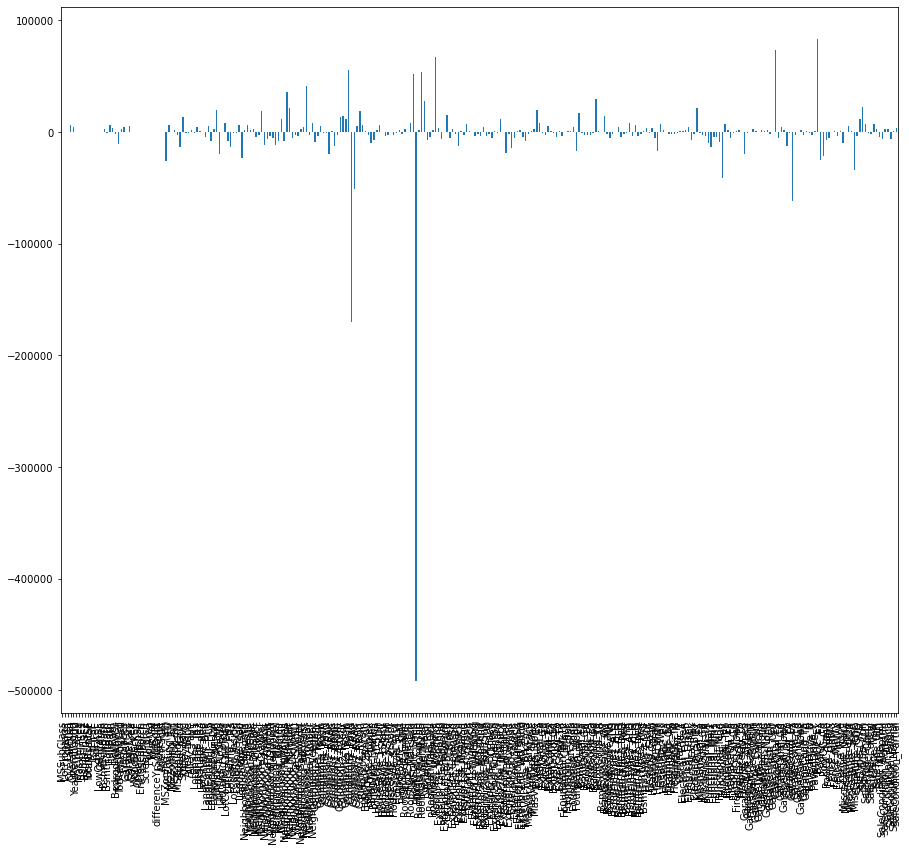

In [92]:
Ridge_model = Ridge(alpha=0.1,normalize=True)
run_model(Ridge_model, train_X, train_y, test_X, sample, "HP_predresults_ridge.csv" )

In [93]:
print("Training set score_Ridge: {:.2f}".format(Ridge_model.score(train_X, train_y)))
print("Number of features used_Ridge: {}".format(np.sum(Ridge_model.coef_ != 0)))

Training set score_Ridge: 0.93
Number of features used_Ridge: 298


Mean Absolute Error of train data =  14245.626120123334
RMSE of train data =  22634.754618384915
Cross validation Score  =  30543.049734029344
Mean Absolute Percentage Error of train data =  8.33015580326029


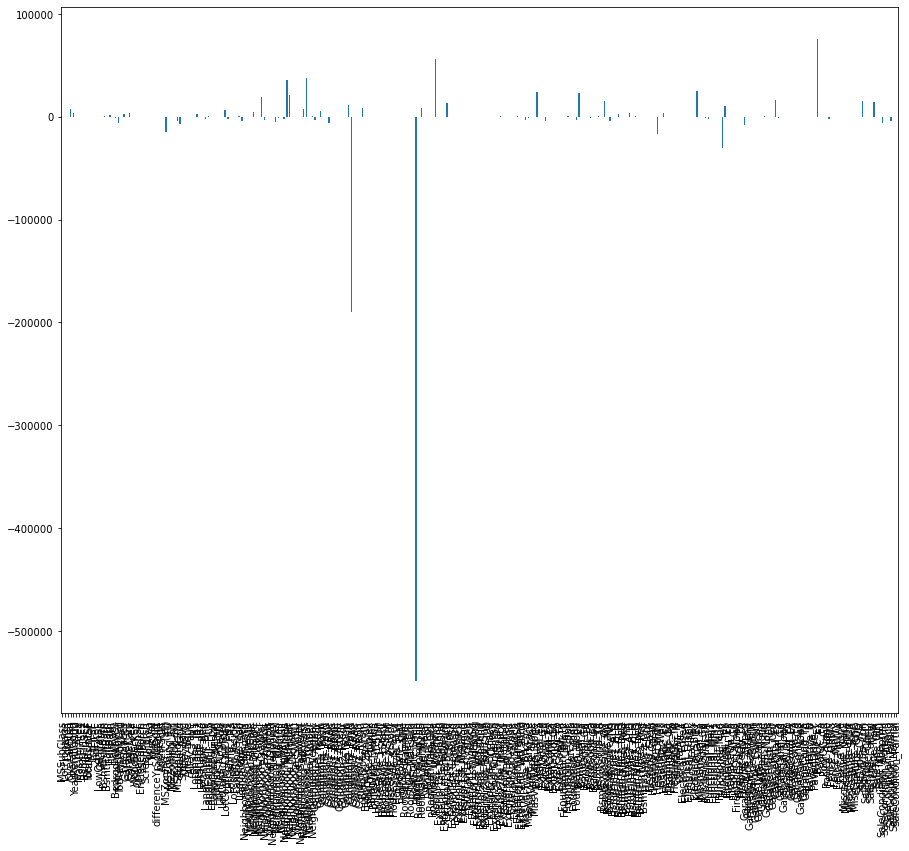

In [94]:
Lasso_model = Lasso(alpha=20,normalize=True)
run_model(Lasso_model, train_X, train_y, test_X, sample, "HP_predresults_lasso.csv" )

In [95]:
print("Training set score_Lasso: {:.2f}".format(Lasso_model.score(train_X, train_y)))
print("Number of features used_Lasso: {}".format(np.sum(Lasso_model.coef_ != 0)))

Training set score_Lasso: 0.92
Number of features used_Lasso: 91


Mean Absolute Error of train data =  14416.472634316557
RMSE of train data =  23031.841135337818
Cross validation Score  =  29191.802758408456
Mean Absolute Percentage Error of train data =  8.488011625251996


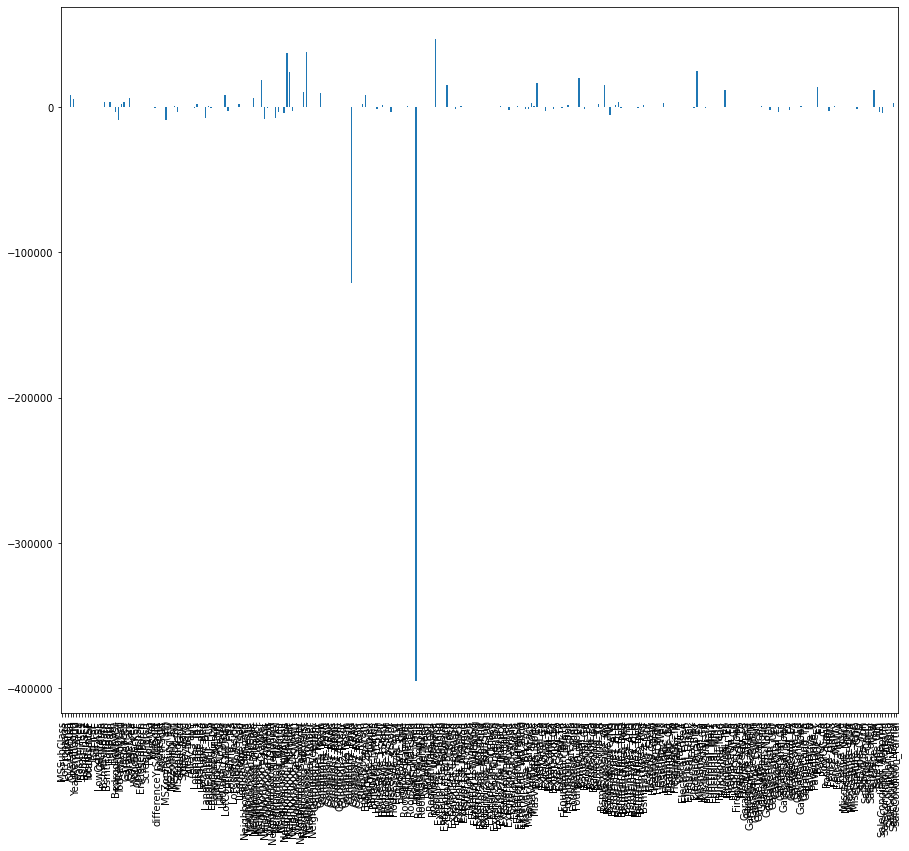

In [96]:
ElasticNet_model = ElasticNet(alpha=100,l1_ratio=1, max_iter=1000000)
run_model(ElasticNet_model, train_X, train_y, test_X, sample, "HP_predresults_elasticnet.csv" )

In [97]:
print("Training set score_elasticnet: {:.2f}".format(ElasticNet_model.score(train_X, train_y)))
print("Number of features used_elasticnet: {}".format(np.sum(ElasticNet_model.coef_ != 0)))

Training set score_elasticnet: 0.92
Number of features used_elasticnet: 116


Text(0, 0.5, 'coefficient magnitude')

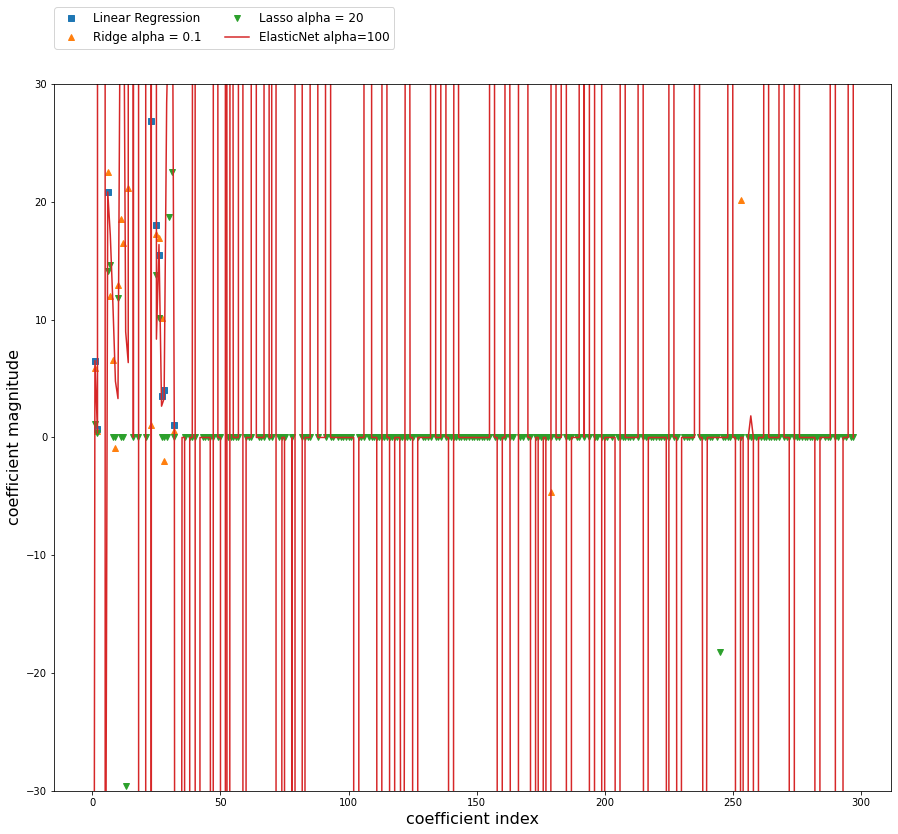

In [98]:
plt.plot(LR_model.coef_,'s',label = "Linear Regression")
plt.plot(Ridge_model.coef_,'^',label = "Ridge alpha = 0.1")
plt.plot(Lasso_model.coef_,'v',label = "Lasso alpha = 20")
plt.plot(ElasticNet_model.coef_, label = "ElasticNet alpha=100")
plt.legend(ncol=2, loc=(0, 1.05), fontsize = 12)
plt.ylim(-30, 30)
plt.xlabel("coefficient index", fontsize = 16)
plt.ylabel("coefficient magnitude", fontsize = 16)

In [99]:
sample = pd.read_csv("sample_HP.csv")
def run_model_1(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("Mean Absolute Error of train data = ",mean_absolute_error(train_y,pred_train))
    print("RMSE of train data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    print("Mean Absolute Percentage Error of train data = ", mean_absolute_percentage_error(train_y, pred_train))
    sample["SalePrice"] = pred_test
    sample.to_csv(filename, index = False)


In [100]:
DecisionTreeRegressor_model = DecisionTreeRegressor(max_depth = 12, random_state=0)
run_model_1(DecisionTreeRegressor_model, train_X, train_y, test_X, sample, "HP_predresults_DecisionTreeRegression.csv" )

Mean Absolute Error of train data =  3471.024398896489
RMSE of train data =  6633.118470825234
Cross validation Score  =  39645.51304767919
Mean Absolute Percentage Error of train data =  2.3837839252978736


In [101]:
print("Training set score DecisionTreeRegressor: {:.2f}".format(DecisionTreeRegressor_model.score(train_X, train_y)))
print("Number of features used DecisionTreeRegressor: {}".format(np.sum(DecisionTreeRegressor_model.feature_importances_ != 0)))

Training set score DecisionTreeRegressor: 0.99
Number of features used DecisionTreeRegressor: 159


In [102]:
RandomForestRegressor_model = RandomForestRegressor(max_depth = 12,n_estimators=200, n_jobs=-1, random_state=42)
run_model_1(RandomForestRegressor_model, train_X, train_y, test_X, sample, "HP_predresults_RandomForestRegression.csv" )

Mean Absolute Error of train data =  7119.837227009729
RMSE of train data =  11350.381191543427
Cross validation Score  =  29257.713637568057
Mean Absolute Percentage Error of train data =  4.235857950538769


In [103]:
print("Training set score RandomForestRegressor: {:.2f}".format(RandomForestRegressor_model.score(train_X, train_y)))
print("Number of features used RandomForestRegressor: {}".format(np.sum(RandomForestRegressor_model.feature_importances_ != 0)))

Training set score RandomForestRegressor: 0.98
Number of features used RandomForestRegressor: 295


In [104]:
GradientBoostingRegressor_model = GradientBoostingRegressor(max_depth = 4, random_state=42)
run_model_1(GradientBoostingRegressor_model,train_X, train_y, test_X, sample, "HP_predresults_GradientBoostingRegression.csv" )

Mean Absolute Error of train data =  8174.798486128092
RMSE of train data =  10763.160258066031
Cross validation Score  =  25912.277846293513
Mean Absolute Percentage Error of train data =  5.089259865336875


In [105]:
print("Training set score GradientBoostingRegressor: {:.2f}".format(GradientBoostingRegressor_model.score(train_X, train_y)))
print("Number of features used GradientBoostingRegressor: {}".format(np.sum(GradientBoostingRegressor_model.feature_importances_ != 0)))

Training set score GradientBoostingRegressor: 0.98
Number of features used GradientBoostingRegressor: 179


In [106]:
XGBRegressor_model = XGBRegressor(max_depth = 3, random_state=0)
run_model_1(XGBRegressor_model, train_X, train_y, test_X, sample, "HP_predresult_XGBRegression.csv" )

Mean Absolute Error of train data =  7826.697597388698
RMSE of train data =  10533.763738248264
Cross validation Score  =  27079.01030980522
Mean Absolute Percentage Error of train data =  4.897383696769699


In [107]:
print("Training set score XGBRegressor: {:.2f}".format(XGBRegressor_model.score(train_X, train_y)))
print("Number of features used XGBRegressor: {}".format(np.sum(XGBRegressor_model.feature_importances_ != 0)))

Training set score XGBRegressor: 0.98
Number of features used XGBRegressor: 123
